In [8]:
import os
import fastmri
from fastmri.data import transforms
import numpy as np
import torch
import pytorch_lightning as pl
import PIL
import pandas as pd
import h5py
from matplotlib import pyplot as plt
import nibabel as nib
import pydicom

%matplotlib inline

In [9]:
base_folder = "/data/projects/dwi_aisd/dicoms"
file_names = os.listdir(base_folder)
output_dir = "/data/projects/dwi_aisd/DWIs_nii/"

In [35]:
import dicom2nifti

dicom2nifti.convert_directory(os.path.join(base_folder, file_names[0], "DWI"), output_dir, compression=True, reorient=True)
try:
    os.rename(os.path.join(output_dir, "9_ep2d_diff_3scan_trace_p2_tracew" + ".nii.gz"), os.path.join(output_dir, "0019983_DWI" + ".nii.gz"))
except OSError:
    os.remove(os.path.join(output_dir, "0019983_DWI" + ".nii.gz"))
    os.rename(os.rename(os.path.join(output_dir, "9_ep2d_diff_3scan_trace_p2_tracew" + ".nii.gz"), os.path.join(output_dir, "0019983_DWI" + ".nii.gz")))

{'image': <nibabel.fileholders.FileHolder object at 0x7fb2d1072bb0>}
(160, 160, 18)


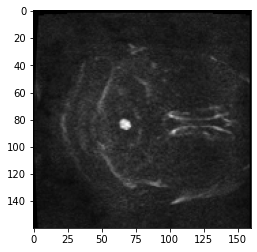

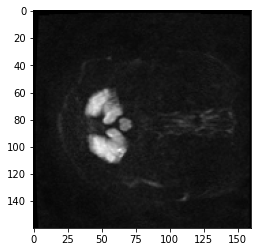

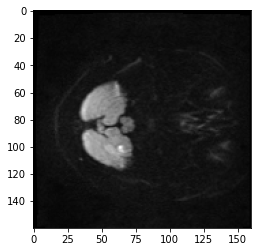

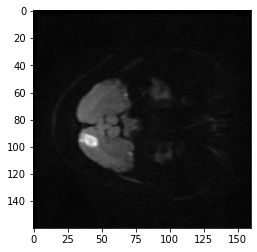

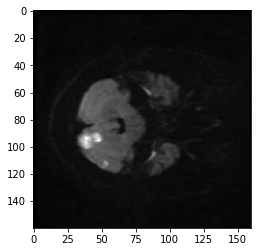

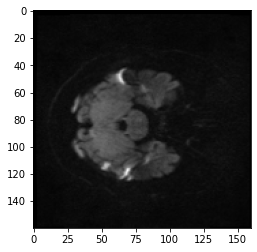

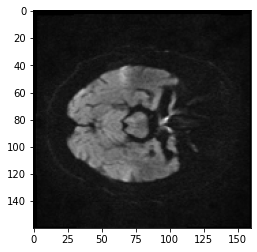

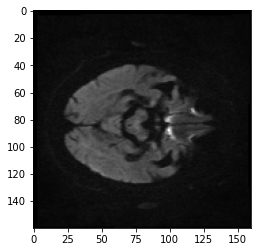

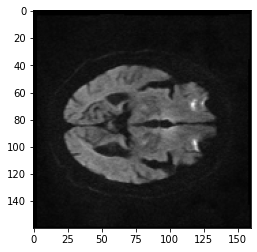

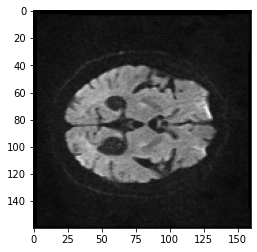

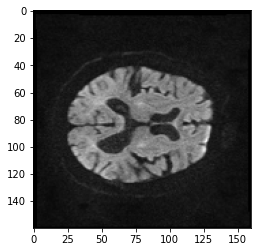

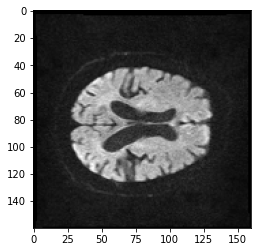

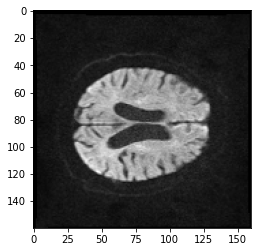

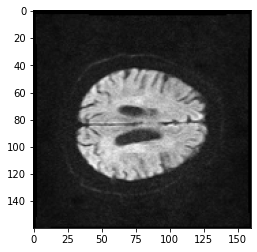

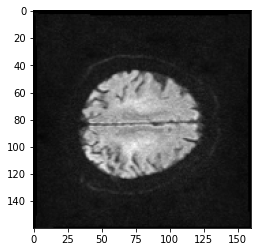

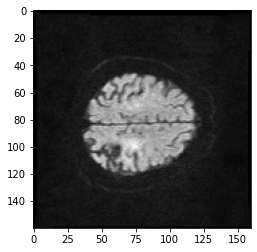

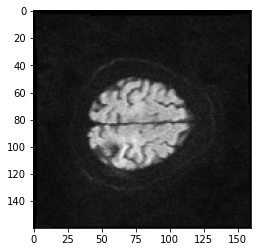

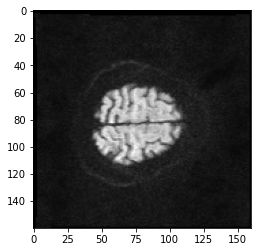

In [97]:
nii_file_path = "/data/projects/dwi_aisd/DWIs_nii/0019983_DWI.nii.gz"
nii_numpy = np.array(nib.load(nii_file_path).dataobj)
print(nii_numpy.shape)
for i in range(18):
    plt.imshow(nii_numpy[:, :, i], cmap="gray")
    plt.show()

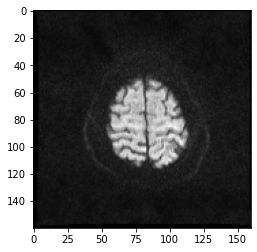

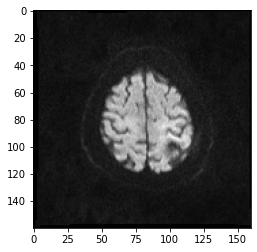

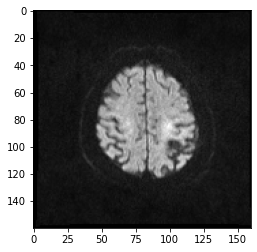

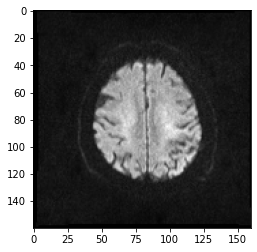

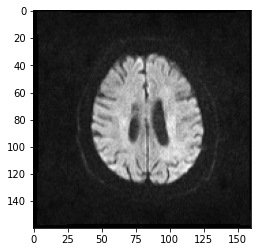

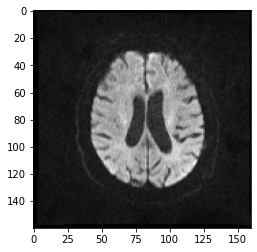

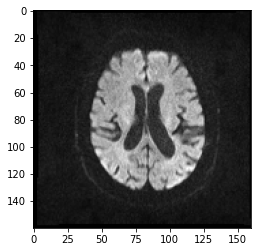

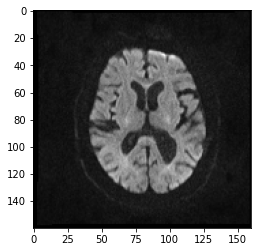

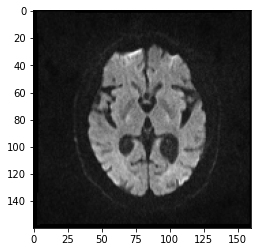

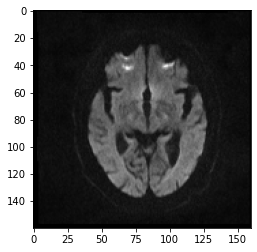

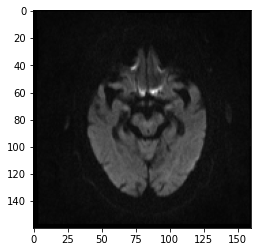

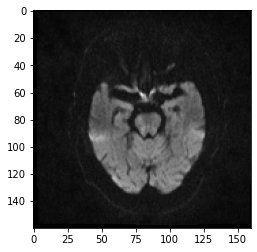

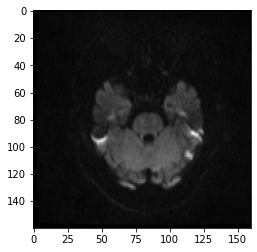

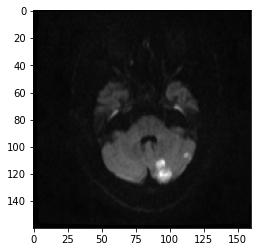

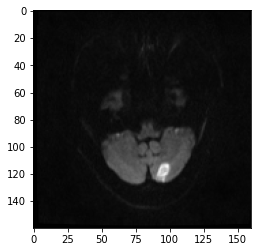

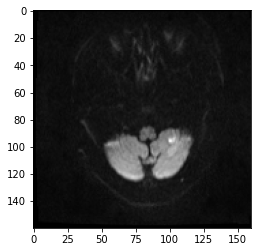

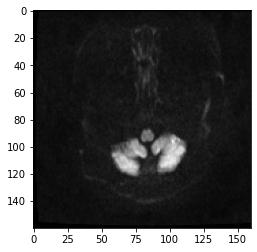

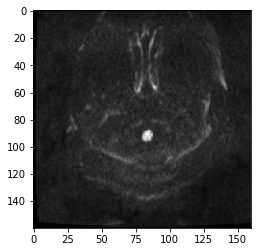

In [93]:
from pydicom import dcmread
dcm_file_path = "/data/projects/dwi_aisd/dicoms/0019983/DWI"
for _ in os.listdir(dcm_file_path):
    nii_numpy = dcmread(os.path.join(dcm_file_path, _)).pixel_array
    plt.imshow(nii_numpy[:, :], cmap="gray")
    plt.show()

(512, 512, 17)
0.0 0.1744265140232918 0.6931471805599453


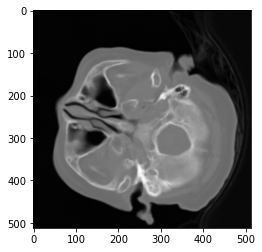

0.0 0.1801945723337783 0.6931471805599453


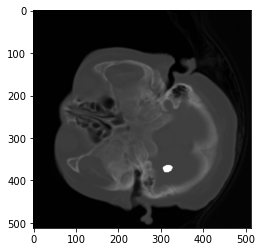

0.0 0.16594443382522614 0.6931471805599453


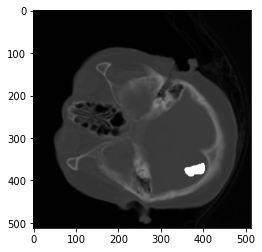

0.0 0.182079557353223 0.6931471805599453


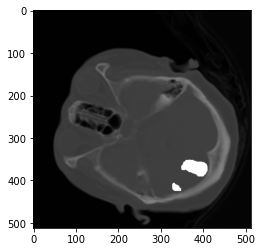

0.0 0.1871449306184415 0.6931471805599453


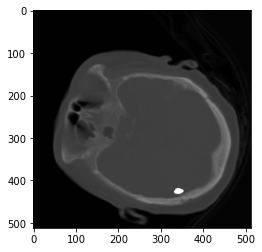

0.0 0.1918049780623527 0.6931471805599453


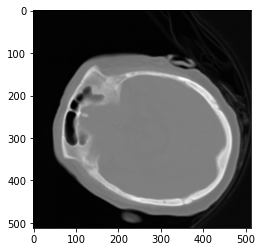

0.0 0.18839476538260136 0.6931471805599453


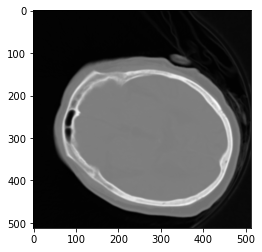

0.0 0.18258535829124023 0.6931471805599453


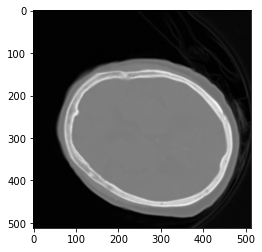

0.0 0.18614818867744962 0.6931471805599453


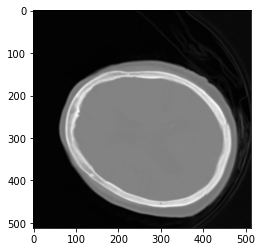

0.0 0.18111929313568376 0.6931471805599453


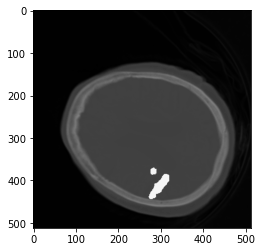

0.0 0.1728117971089454 0.6931471805599453


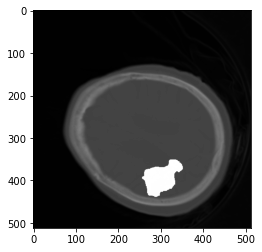

0.0 0.16735638216578783 0.6931471805599453


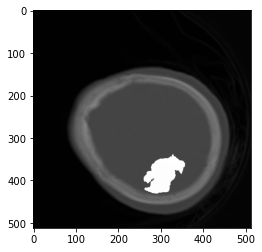

0.0 0.15899262604646414 0.6931471805599453


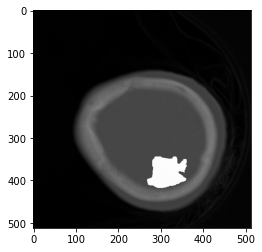

0.0 0.14438136746329774 0.6931471805599453


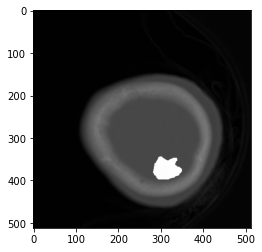

0.0 0.1255456518898244 0.6931471805599453


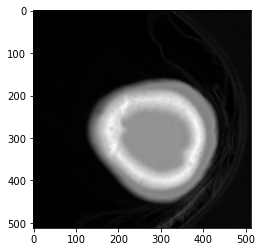

0.0 0.09385156787272941 0.6931471805599453


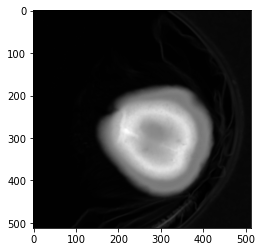

0.0 0.07183610583672355 0.6931471805599453


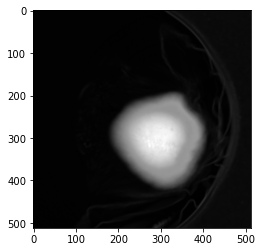

In [89]:
ct_file_path = "/data/projects/dwi_aisd/CTs_laura/0019983_CT.nii.gz"
mask_file_path = "/data/projects/dwi_aisd/Masks_laura/0019983_mask.nii.gz"
ct_numpy = np.array(nib.load(ct_file_path).dataobj)
mask_numpy = np.array(nib.load(mask_file_path).dataobj)
print(nii_numpy.shape)
for i in range(17):
    ct = ct_numpy[:, :, i]
    ct = (ct - ct.mean())/ct.std()
    ct -= np.min(ct)
    ct = np.divide(ct, np.max(ct))
    ct = np.log(ct+1)
    print(np.min(ct), np.mean(ct), np.max(ct))
    mask = mask_numpy[:, :, i]/(max(1, np.max(mask_numpy[:, :, i])))
    plt.imshow(ct + mask, cmap="gray")
    plt.show()